# How to Automate Data Cleaning with AI <a id="make-a-data-cleaning-agent"></a>

In this tutorial, you will learn how to automate data cleaning with AI. It can automatically:

- detect and fix common data cleaning issues
- missing values
- duplicate rows
- inconsistent data types. 
 
By using this AI agent, you can save time and effort on data cleaning, allowing you to focus on more important tasks.

# Table of Contents

1. [Make A Data Cleaning Agent](#make-a-data-cleaning-agent)
2. [Load Libraries](#load-libraries)
3. [Setup AI and Logging](#setup-ai-and-logging)
4. [Load a Dataset](#load-a-dataset)
5. [Create The Agent](#create-the-agent)
6. [Response](#response)
7. [The cleaning recipe](#the-cleaning-recipe)
8. [Data Cleaner Function](#data-cleaner-function)
9. [Cleaned Data As Pandas Data Frame](#cleaned-data-as-pandas-data-frame)

### Load Libraries <a id="load-libraries"></a>

In [3]:
# * Libraries

from langchain_openai import ChatOpenAI
import pandas as pd
import os
from dotenv import load_dotenv

from src.agents import DataCleaningAgent

### Setup AI <a id="setup"></a>

This section of code sets up the LLM inputs and the logging information. Logging is used to store AI-generated code and files during the agent's processing of files. 

This example uses OpenAI's API. But any LLM can be used. eg) Anthropic or local LLMs with Ollama.

In [7]:
# * Setup

MODEL    = "gpt-4o-mini"
LOG      = True
LOG_PATH = os.path.join(os.getcwd(), "logs/")

# Load environment variables from .env file
load_dotenv('../.env')

llm = ChatOpenAI(model= MODEL)
llm

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x1335a4790>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x1333912d0>, root_client=<openai.OpenAI object at 0x13342b9d0>, root_async_client=<openai.AsyncOpenAI object at 0x1335a5e10>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'))

### Load a Dataset <a id="load-a-dataset"></a>

Next, let's load a customer churn data set that we will clean up. 

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/business-science/ai-data-science-team/refs/heads/master/data/churn_data.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Create The Agent <a id="create-the-agent"></a>

Run this code to create an agent with `make_data_cleaning_agent()`.

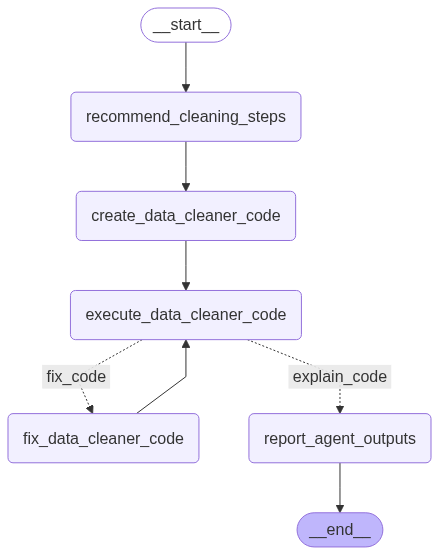

In [8]:
data_cleaning_agent = DataCleaningAgent(
    model = llm, 
    log=LOG, 
    log_path=LOG_PATH
)

data_cleaning_agent

This creates an `app`, which is a langgraph agent with the main inputs:

- **user_instructions**: The data cleaning agent will use these comments to modify the "standard recipe" 
  - Standard Recipe: The standard cleaning recipe which includes removing columns with more than 40% missing values, imputing missing values using mean (numeric) or mode (categorical), removing duplicate rows, and removing outliers. 
- **data_raw**: The raw data to be cleaned
- **max_retries**: Used to limit the number of attempts to fix the python code generated by the agent. Set this to 3 to limit to 3 attempts. 
- **retry_count**: Set this to 0. 

In [9]:
data_cleaning_agent.invoke_agent(
    data_raw=df,
    user_instructions="Don't remove outliers when cleaning the data.",
    max_retries=3,
    retry_count=0
)  

---DATA CLEANING AGENT----
    * RECOMMEND CLEANING STEPS
    * CREATE DATA CLEANER CODE
      File saved to: /Users/abhivir42/projects/fetch/ai-data-science/demo/logs/data_cleaner.py
    * EXECUTE AGENT CODE
    * EXECUTING AGENT CODE
🧹 Starting data cleaning: 7043 rows × 21 columns
📊 Step 1: Optimizing data types...
🔧 Step 2: Handling missing values...
   Missing values before cleaning: 11
   Handling 11 missing values in 'TotalCharges' (float64)
   Missing values after cleaning: 0
🗑️ Step 3: Removing duplicates...

📈 CLEANING SUMMARY:
   Original: 7043 rows × 21 columns
   Final: 7043 rows × 21 columns
   Data retention: 100.0%

📝 Actions taken:
   • Filled 11 missing values in 'TotalCharges' with mean (2283.3004408418656)
✅ Data cleaning completed successfully!
Data preservation check:
  Original rows: 7043
  Cleaned rows: 7043
  Data loss: 0.0%
Missing values before cleaning: 0
Missing values after cleaning: 0
    * REPORT AGENT OUTPUTS


{'messages': [AIMessage(content='{\n  "report_title": "Data Cleaning Agent Outputs",\n  "recommended_steps": "# Recommended Data Cleaning Steps:\\nHere are the recommended steps to clean and preprocess the provided dataset, including specific comments on the rationale behind each step:\\n\\n1. **Check for Missing Values**  \\n   Since all columns have 0% missing values, this confirms that no columns will be removed or need imputation.\\n\\n2. **Check Data Types**  \\n   Identify the current data types of all columns. The goal here is to ensure that numeric columns are of a numeric type and categorical columns are of an object or category type.\\n   ```python\\n   # For example:\\n   dataset.dtypes\\n   ```\\n\\n3. **Convert Data Types Where Necessary**  \\n   Change the `TotalCharges` column from object to float, as it contains numeric data that may have been stored as a string type.\\n   ```python\\n   # Convert TotalCharges to float\\n   dataset[\'TotalCharges\'] = pd.to_numeric(data

### Response <a id="response"></a>

The response produced contains everything we need to understand the data cleaning decisions made and get the cleaned dataset. 

In [10]:
response = data_cleaning_agent.get_response()

list(response.keys())

['messages',
 'user_instructions',
 'recommended_steps',
 'data_raw',
 'data_cleaned',
 'all_datasets_summary',
 'data_cleaner_function',
 'data_cleaner_function_path',
 'data_cleaner_file_name',
 'data_cleaner_function_name',
 'data_cleaner_error',
 'max_retries',
 'retry_count']

#### Cleaned Data As Pandas Data Frame using the `get_data_cleaned()` method <a id="cleaned-data-as-pandas-data-frame"></a> 

In [11]:
data_cleaning_agent.get_data_cleaned()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


We can use the `get_data_cleaner_function()` method to get the data cleaner function pipeline. 

- In Jupyter Notebooks, setting `markdown=True` will return the function as markdown code. 
- In Streamlit apps, it's should be `markdown=False`.

In [12]:
data_cleaning_agent.get_data_cleaner_function(markdown=True)

```python
# Disclaimer: This function was generated by AI. Please review before using.
# Agent Name: data_cleaning_agent
# Time Created: 2025-06-16 00:18:05

def data_cleaner(data_raw):
    import pandas as pd
    import numpy as np
    import warnings



    # Suppress pandas warnings for clean output
    warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)
    pd.set_option('mode.chained_assignment', None)
    
    # ALWAYS work on a copy to preserve original
    data = data_raw.copy()
    
    # Initialize tracking variables
    original_shape = data.shape
    original_rows = len(data)
    cleaning_log = []
    
    print(f"🧹 Starting data cleaning: {original_shape[0]} rows × {original_shape[1]} columns")
    
    try:
        # STEP 1: Data Type Optimization
        print("📊 Step 1: Optimizing data types...")
        # Convert TotalCharges from object to float
        data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

        # Convert other appropriate columns to category
        categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 
                            'MultipleLines', 'InternetService', 'OnlineSecurity', 
                            'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                            'StreamingTV', 'StreamingMovies', 'Contract', 
                            'PaperlessBilling', 'PaymentMethod', 'Churn']
        for col in categorical_cols:
            data[col] = data[col].astype('category')
        
        # STEP 2: Handle Missing Values (PRIORITIZE IMPUTATION)
        print("🔧 Step 2: Handling missing values...")
        missing_before = data.isnull().sum().sum()
        print(f"   Missing values before cleaning: {missing_before}")
        
        for col in data.columns:
            if data[col].isnull().sum() > 0:
                col_dtype = str(data[col].dtype)
                missing_count = data[col].isnull().sum()
                print(f"   Handling {missing_count} missing values in '{col}' ({col_dtype})")

                if pd.api.types.is_numeric_dtype(data[col]):
                    # Use median for skewed data
                    fill_value = data[col].median() if data[col].skew() > 1 else data[col].mean()
                    data[col] = data[col].fillna(fill_value)
                    cleaning_log.append(f"Filled {missing_count} missing values in '{col}' with {'median' if data[col].skew() > 1 else 'mean'} ({fill_value})")

                elif pd.api.types.is_categorical_dtype(data[col]) or pd.api.types.is_object_dtype(data[col]):
                    # Handle categorical columns
                    mode_value = data[col].mode()[0] if not data[col].mode().empty else 'Unknown'
                    data[col] = data[col].fillna(mode_value)
                    cleaning_log.append(f"Filled {missing_count} missing values in '{col}' with mode ({mode_value})")

        missing_after = data.isnull().sum().sum()
        print(f"   Missing values after cleaning: {missing_after}")

        # STEP 3: Remove Duplicates
        print("🗑️ Step 3: Removing duplicates...")
        duplicates_before = data.duplicated().sum()
        if duplicates_before > 0:
            data = data.drop_duplicates()
            cleaning_log.append(f"Removed {duplicates_before} duplicate rows")

        # Additional checks based on specified business domain can be added here
        # STEP 4 might be skipped unless explicitly asked for outlier handling

        # STEP 5: Final Validation and Cleanup
        empty_rows = data.isnull().all(axis=1).sum()
        if empty_rows > 0:
            data = data.dropna(how='all')
            cleaning_log.append(f"Removed {empty_rows} completely empty rows")
    
    except Exception as e:
        print(f"⚠️ Error during cleaning: {str(e)}")
        print("🔄 Returning original data to prevent data loss")
        return data_raw.copy()
    
    # MANDATORY: Data preservation validation
    final_shape = data.shape
    final_rows = len(data)
    data_loss_pct = ((original_rows - final_rows) / original_rows) * 100 if original_rows > 0 else 0
    
    # Comprehensive reporting
    print(f"\n📈 CLEANING SUMMARY:")
    print(f"   Original: {original_shape[0]} rows × {original_shape[1]} columns")
    print(f"   Final: {final_shape[0]} rows × {final_shape[1]} columns")
    print(f"   Data retention: {100-data_loss_pct:.1f}%")
    
    if cleaning_log:
        print(f"\n📝 Actions taken:")
        for action in cleaning_log:
            print(f"   • {action}")
    
    if data_loss_pct > 25:
        print(f"🚨 CRITICAL WARNING: High data loss ({data_loss_pct:.1f}%)!")
        print(f"   Consider using more conservative cleaning approaches")
    
    if final_rows == 0:
        print(f"❌ FATAL ERROR: All data was removed! Returning original data")
        return data_raw.copy()
    
    print(f"✅ Data cleaning completed successfully!")
    return data
```

#### Recommended Steps

To get the recommended steps during the data analysis (prior to coding), run the `get_recommended_steps()` method.

In [13]:
data_cleaning_agent.get_recommended_cleaning_steps(markdown=True)

# Recommended Data Cleaning Steps:
Here are the recommended steps to clean and preprocess the provided dataset, including specific comments on the rationale behind each step:

1. **Check for Missing Values**  
   Since all columns have 0% missing values, this confirms that no columns will be removed or need imputation.

2. **Check Data Types**  
   Identify the current data types of all columns. The goal here is to ensure that numeric columns are of a numeric type and categorical columns are of an object or category type.
   ```python
   # For example:
   dataset.dtypes
   ```

3. **Convert Data Types Where Necessary**  
   Change the `TotalCharges` column from object to float, as it contains numeric data that may have been stored as a string type.
   ```python
   # Convert TotalCharges to float
   dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')
   ```

4. **Remove Duplicate Rows**  
   Check for and remove any duplicate rows from the dataset to ensure unique entries.
   ```python
   # Remove duplicate rows
   dataset.drop_duplicates(inplace=True)
   ```

5. **Analyze the Data for Additional Cleaning Steps**  
   Since there are no missing values or duplicates, and outlier removal is not requested, no additional cleaning steps are deemed necessary.  
   Comment: Confirm the analysis indicates that the data is ready for further processing without additional cleaning requirements.

6. **Prepare the Data for Further Analysis**  
   Check the distribution of the numeric columns (like `MonthlyCharges`, `tenure`, etc.) to get an understanding of the data, although not cleaning, this is beneficial for future modeling.
   ```python
   # For example, check distributions
   dataset[['MonthlyCharges', 'tenure']].describe()
   ```

In summary, crucial steps 1-5 ensure that data integrity and quality are upheld. As all columns are intact with proper types, this dataset appears clean and ready for subsequent data processes such as modeling or exploratory data analysis, without needing further adjustments as per user instructions.